In [5]:
import json
import os
import tempfile
import time

import networkx as nx
import torch
from torch import nn
import torch.nn.functional as F
import sys
import dgl
import numpy as np
import pandas as pd
from tqdm import tqdm as tq
import mlflow
from collections import defaultdict
sys.path.append('..')
from model.models_dgl import FixedNet

from build_graph import BA4labelDataset,build_graph
from benchmark_dgl import Benchmark
from method.explain_methods_dgl import explain_random

def generate_single_sample(label, perturb_type, nodes_num = 25, m = 1, perturb_dic = {}, 
    seed = None, no_attach_init_nodes=False):
    '''
    This function is for test model return a networkx instance.
    '''
    basis_type = "ba"
    which_type = label
    if which_type == 0:
        if perturb_type == 0:
            G, role_id, plug_id = build_graph(nodes_num, basis_type, [], start = 0, m = m, seed = seed, no_attach_init_nodes=no_attach_init_nodes)
        else:
            G, role_id, plug_id = build_graph(nodes_num - perturb_type, basis_type, [[perturb_dic[perturb_type]]], start = 0, m = m, seed = seed, no_attach_init_nodes=no_attach_init_nodes)
    else:
        list_shapes = [["house"]] * (which_type - 1) + [["five_cycle"]] * (3 - which_type)
        if perturb_type != 0:
            list_shapes = list_shapes + [[perturb_dic[perturb_type]]]
        G, role_id, plug_id = build_graph(nodes_num-10-perturb_type, basis_type, list_shapes, start = 0, m = m, seed = seed, no_attach_init_nodes=no_attach_init_nodes)
    return G
def test_model_output_distribution(graph_class,graph_num):
    model_fixed = FixedNet(1, 4, 2, False, 'GraphConvWL')
    model_fixed.set_paramerters()
    device = torch.device('cuda')
    model_fixed = model_fixed.to(device)
    model_fixed.unuse_report()
    result = []
    for i in range(graph_num):
        G = generate_single_sample(graph_class, 0, nodes_num = 50, m = 5, perturb_dic = {}, no_attach_init_nodes = True)
        G = dgl.from_networkx(G)
        cut_index = np.random.choice(list(range(G.num_edges())))
        G = dgl.remove_edges(G, cut_index)
        G = G.to(device)
        result.append(model_fixed(G, torch.ones((50,1)).to(device)).cpu().item())
    return result


In [6]:
import matplotlib.pyplot as plt
from collections import Counter

Counter({0.0: 9999, 3.0: 1})


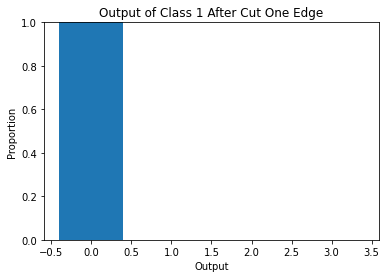

In [17]:
result0 = test_model_output_distribution(0,10000)
c = Counter(result0)
print(c)
plt.bar(list(c.keys()),np.array(list(c.values()))/10000)
plt.ylim(0,1)
plt.ylabel('Proportion')
plt.xlabel('Output')
plt.title('Output of Class 1 After Cut One Edge')
plt.show()

Counter({20.0: 9429, 22.0: 410, 21.0: 100, 25.0: 58, 23.0: 3})


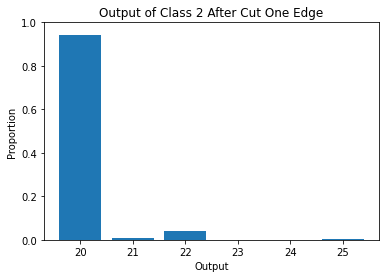

In [16]:
result0 = test_model_output_distribution(1,10000)
c = Counter(result0)
print(c)
plt.bar(list(c.keys()),np.array(list(c.values()))/10000)
plt.ylim(0,1)
plt.ylabel('Proportion')
plt.xlabel('Output')
plt.title('Output of Class 2 After Cut One Edge')
plt.show()

Counter({14.0: 9381, 16.0: 310, 17.0: 143, 15.0: 75, 19.0: 64, 18.0: 27})


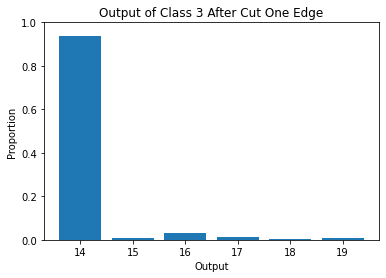

In [15]:
result0 = test_model_output_distribution(2,10000)
c = Counter(result0)
print(c)
plt.bar(list(c.keys()),np.array(list(c.values()))/10000)
plt.ylim(0,1)
plt.ylabel('Proportion')
plt.xlabel('Output')
plt.title('Output of Class 3 After Cut One Edge')
plt.show()

Counter({8.0: 9332, 11.0: 299, 10.0: 202, 12.0: 59, 13.0: 54, 9.0: 54})


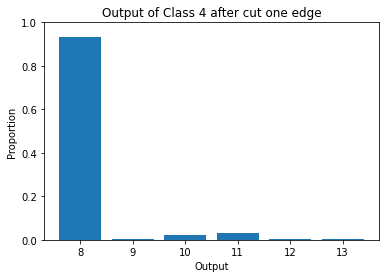

In [14]:
result0 = test_model_output_distribution(3,10000)
c = Counter(result0)
print(c)
plt.bar(list(c.keys()),np.array(list(c.values()))/10000)
plt.ylim(0,1)
plt.ylabel('Proportion')
plt.xlabel('Output')
plt.title('Output of Class 4 After Cut One Edge')
plt.show()

In [12]:
[1,2,3]/2

TypeError: unsupported operand type(s) for /: 'list' and 'int'